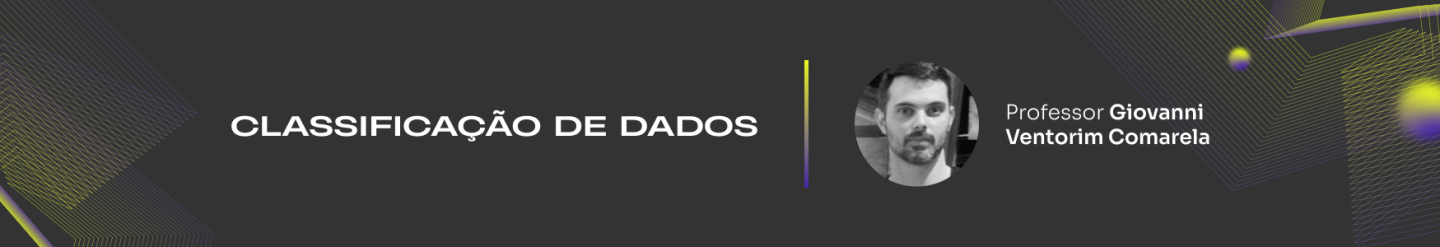

# Introdução ao Classificador KNN

Na aula de hoje, veremos nosso primeiro classificador, o KNN (do inglês, $k$-*Nearest Neighbors*).

Antes disso, vamos revisar o que é a tarefa de Classificação em Aprendizado Supervisionado.

## Relembrando: a tarefa de classificação

### Entrada

Como motivado nos exemplos acima, a entrada de uma tarefa de classificação é um conjunto de dados contendo uma matriz real, $\mathbf{X}$, com $n$ linhas e $d$ colunas, e um vetor de valores discretos, $\mathbf{y}$. Ilustrando, temos
$$\mathbf{X} = \begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1d} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \dots  & x_{nd}
\end{bmatrix}
\ \ \ \ \text{ e }\ \ \ \ \ \mathbf{y} = \begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix},
$$
onde:
* Cada linha de $\mathbf{X}$ representa um **objeto** de interesse (e.g., uma imagem de um dígito ou uma amostra de vinho);
* Cada coluna de $\mathbf{X}$ representa uma **característica** dos objetos (e.g., a cor de um píxel ou uma medida de amostra de vinho); e
* A $i$-ésima linha de $\mathbf{X}$ possui **rótulo** $y_i$.


É comum ver na literatura $\mathbf{X}$ e $\mathbf{y}$ representados como um conjunto de pares ordenados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, onde:
- $\mathbf{x}_i$ é o vetor que representa a $i$-ésima linha de $\mathbf{X}$; e
- $y_i$ é o rótulo de $\mathbf{x}_i$.

### Saída

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar uma função $f$ que aprenda dos **objetos** os **rótulos**.

Qualquer função $f$ serve? **Não**! Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$, não pertencente ao conjunto $D$, for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

### Exemplo

Aprender os dígitos reais relacionados a imagens de dígitos escritos à mão.

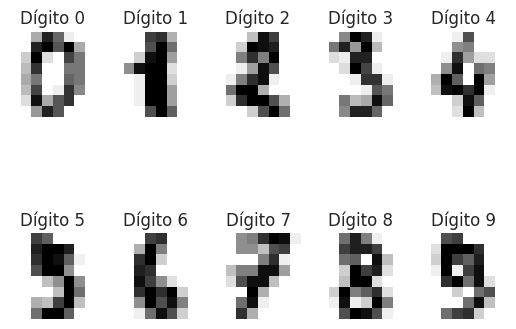

In [1]:
#@title

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set()

digits = datasets.load_digits(return_X_y = False, as_frame = True)

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Dígito %i' % label)

## KNN - $k$ Vizinhos mais próximos

Para entender como o KNN funciona, usaremos um exemplo bem simples.

A imagem abaixo apresenta um conjunto de dados com:
- Duas classes - ``Vermelho`` e ``Azul``; e
- Duas características - ``A`` e ``B``.

Vamos supor que os objetos (pontos) representados na figura compõem o **conjunto de treinamento** para a construção de um classificador.

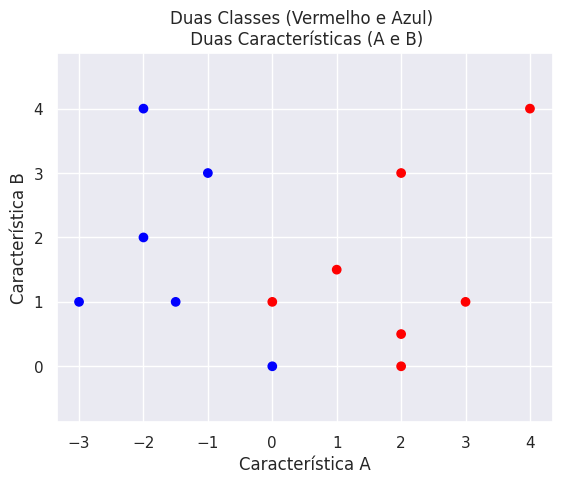

In [2]:
#@title

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

demo_y = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
demo_X = np.array([[-3,1], [-2, 4], [-2, 2], [-1.5, 1], [-1, 3], [0, 0], [1, 1.5], [2, 0.5], [2, 3], [2, 0], [3, 1], [4, 4], [0, 1]])
test_X = [-0.3, 0.7]

plt.scatter(demo_X[:,0], demo_X[:,1], c=demo_y, cmap=cmap_bold)
plt.axis('equal')

plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title('Duas Classes (Vermelho e Azul) \n Duas Características (A e B)');

A ideia do KNN é que, na tarefa de teste (i.e., classificar uma instância desconhecida), ele simplesmente "olha" os pontos do conjunto de treinamento que estão mais próximos do ponto consultado. A classe de retorno é baseada na classe de tais "vizinhos".

Por "mais próximo", geralmente, estamos falando em termos de Distância Euclidiana.

Por exemplo, na figura abaixo, qual deveria ser o rótulo (ou a classe) do ponto $\mathbf{x}$?

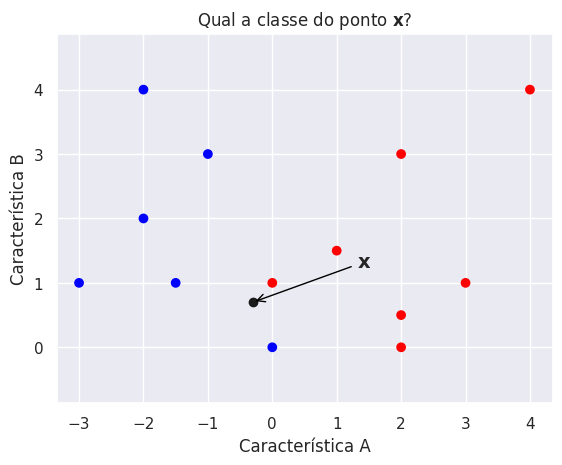

In [3]:
#@title
plt.scatter(demo_X[:,0], demo_X[:,1], c=demo_y, cmap=cmap_bold)
plt.plot(test_X[0], test_X[1], 'ok')
plt.annotate(r'$\mathbf{x}$', test_X, [75, 25],
             textcoords = 'offset points', fontsize = 14,
             arrowprops = {'arrowstyle': '->', 'color': 'black'})
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title(r'Qual a classe do ponto $\mathbf{x}$?');

No KNN, a classe de $\mathbf{x}$ será a classe mais popular entre os $k$ vizinhos mais próximos ao ponto $\mathbf{x}$ no conjunto de treinamento.

Na Figura abaixo, considerando $k = 1$ (Classificador 1NN), temos que $\mathbf{x}$ deve ser classificado como pertencente à classe ``Vermelho``.

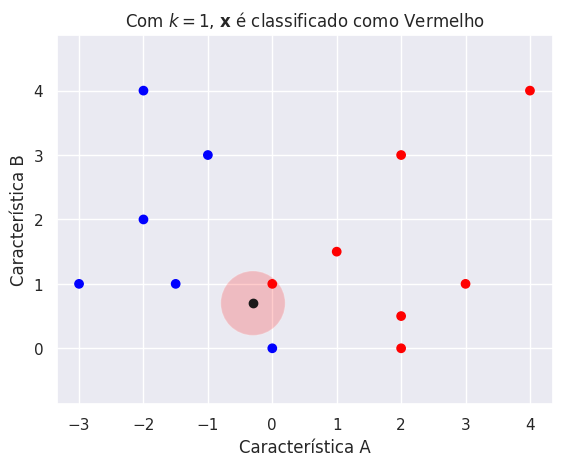

In [4]:
#@title

import matplotlib as mp

plt.scatter(demo_X[:,0], demo_X[:,1], c=demo_y, cmap=cmap_bold)
plt.plot(test_X[0], test_X[1], 'ok')
ax=plt.gcf().gca()
circle = mp.patches.Circle(test_X, 0.5, facecolor = 'red', alpha = 0.2)
plt.axis('equal')
ax.add_artist(circle)
plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title(r'Com $k = 1$, $\mathbf{x}$ é classificado como Vermelho');

Considerando $k = 2$ (Classificador 2NN), temos um empate. Entre os dois vizinhos mais próximos de $\mathbf{x}$, um pertence à classe ``Azul`` e outro pertence à classe ``Vermelho``. Nesse caso, não é claro qual deve ser a classe de $\mathbf{x}$. Empates podem ser quebrados de forma arbitrária.



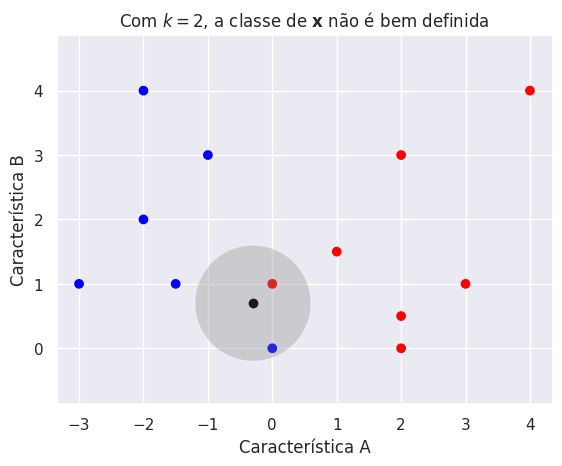

In [5]:
#@title

plt.scatter(demo_X[:,0], demo_X[:,1], c=demo_y, cmap=cmap_bold)
test_X = [-0.3, 0.7]
plt.plot(test_X[0], test_X[1], 'ok')
ax=plt.gcf().gca()
circle = mp.patches.Circle(test_X, 0.9, facecolor = 'gray', alpha = 0.3)
plt.axis('equal')
ax.add_artist(circle)
plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title(r'Com $k = 2$, a classe de $\mathbf{x}$ não é bem definida');

Considerando $k = 3$ (Classificador 3NN), $\mathbf{x}$ deve ser classificado como ``Azul``.



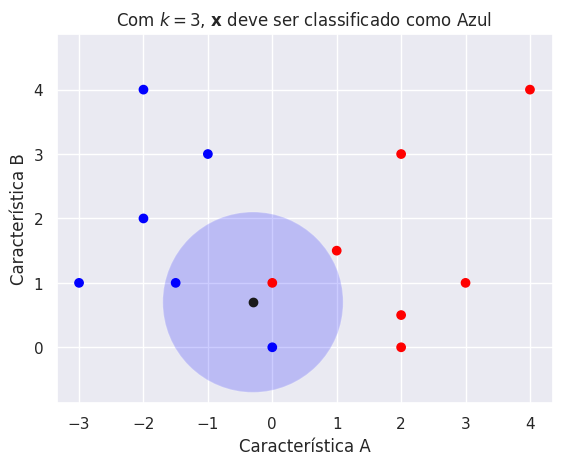

In [6]:
#@title

plt.figure()
ax=plt.gcf().gca()
circle = mp.patches.Circle(test_X, 1.4, facecolor = 'blue', alpha = 0.2)
ax.add_artist(circle)
plt.scatter(demo_X[:,0], demo_X[:,1], c=demo_y, cmap=cmap_bold)
test_X = [-0.3, 0.7]
plt.plot(test_X[0], test_X[1], 'ok')
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title(r'Com $k = 3$, $\mathbf{x}$ deve ser classificado como Azul');

### Funcionamento do KNN



Os exemplos acima, ilustram bem o funcionamento do KNN.

#### Entrada

- um conjunto de treinamento $D = \{(\mathbf{x}_i, y_i)\}_{i = 1}^n$;
- um inteiro $k$ (o "K" do KNN); e
- um ponto de interesse, $\mathbf{x}$, a ser classificado

#### Algoritmo

1. Encontre no conjunto de treinamento, $D$, os $k$ elementos mais próximos de $\mathbf{x}$ e suas respectivas classes.
2. Retorne a classe mais popular entre os $k$ vizinhos mais próximos de $\mathbf{x}$.

### Perguntas importantes

1. Como implementar o KNN de forma eficiente?
2. A escolha de $k$ tem algum impacto significativo?
3. Como usar o KNN na ``scikit-learn``?

### Respostas

1. Há Estruturas de Dados apropriadas para a tarefa. No entanto, essa discussão está fora do escopo dessa disciplina.

2. Nos exemplos a seguir, veremos que a escolha de $k$ é importante! Observe que $k$ é um valor que deve ser **fornecido pelo usuário do classificador**. Em aprendizado de máquina, essas quantidades são chamadas de **hiperparâmetros**.
Um procedimento adequado para escolha de hiperparâmetros será apresentado em aulas futuras.

3. Fácil! Veremos um exemplo já já!

## Exemplo I - Impacto do valor de $k$

Considere o conjunto de treinamento apresentado na figura abaixo.

De forma análoga ao exemplo anterior, nesse conjunto há **duas características** (``A`` e ``B``) e três classes (``Vermelho``, ``Azul`` e ``Verde``).

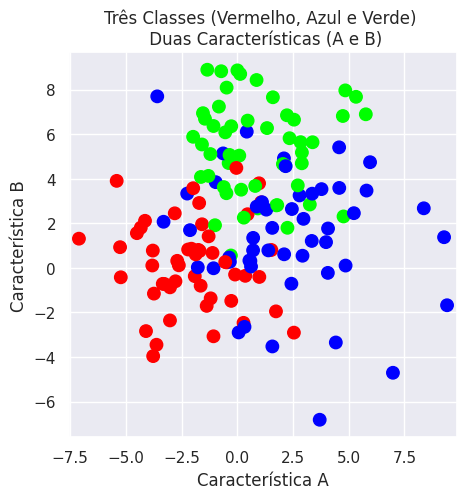

In [7]:
#@title
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X, y = sk_data.make_blobs(n_samples=150,
                          centers=[[-2, 0],[1, 5], [2.5, 1.5]],
                          cluster_std = [2, 2, 3],
                          n_features=2,
                          center_box=(-10.0, 10.0),random_state=0)
plt.figure(figsize = (5,5))
plt.axis('equal')
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, s = 80);

plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title('Três Classes (Vermelho, Azul e Verde) \n Duas Características (A e B)');

Se variarmos o valor de $k$, haverá impacto nos resultados das classificações?

Para responder a essa pergunta, vamos observar o que ocorre com as **regiões de decisão** para vários valores de $k$.

A figura abaixo apresenta as regiões de decisão para $k = 25$.

Em outras palavras, pontos a serem classificados que estiverem na região verde, serão classificados como sendo da classe ``Verde``. De forma análoga, o mesmo vale para pontos que estiverem nas regiões azul e vermelha.

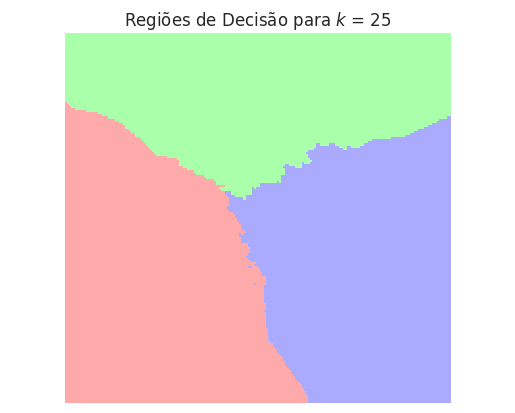

In [15]:
#@title
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

k = 25
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')
plt.axis('equal')
plt.axis('off')
plt.title(f'Regiões de Decisão para $k$ = {k}');

Vejamos o que acontece para outros valores de $k$.

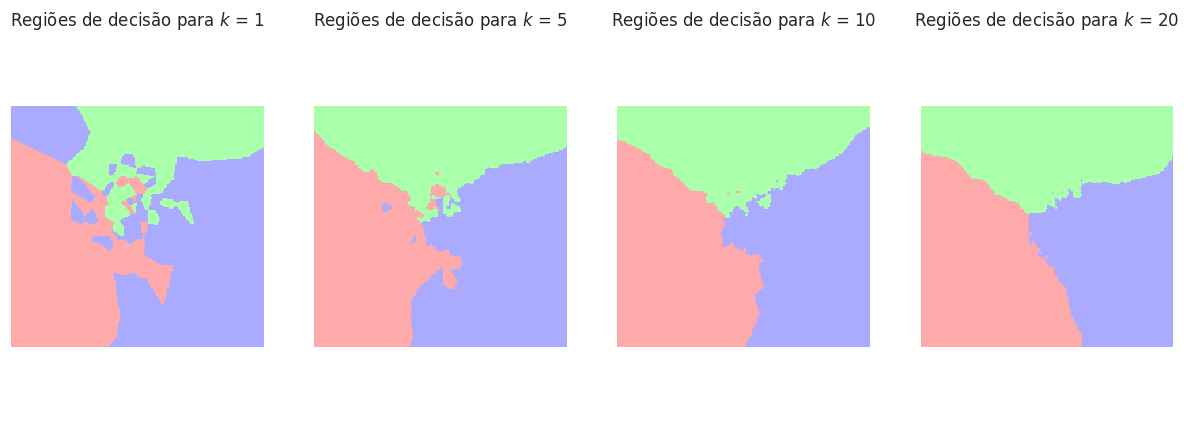

In [16]:
#@title
from sklearn.neighbors import KNeighborsClassifier


h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, k in enumerate([1, 5, 10, 20]):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')
    axs[i].axis('equal')
    axs[i].axis('off')
    axs[i].set_title(f'Regiões de decisão para $k$ = {k}');

Pelos resultados obtidos, podemos perceber que a escolha de $k$ impacta muito os resultados das classificações!

Nas próximas aulas, veremos como essa escolha pode ser feita de maneira adequada.

## Exemplo II - Utilizando o KNN na ``scikit-learn``

A biblioteca ``scikit-learn`` possui uma implementação do KNN que pode ser utilizada de maneira muito simples.

A documentação pode ser consultada [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Para exemplificar o uso do KNN na ``scikit-learn``, vamos usar o conjunto de dados ``wine``, apresentado em aulas anteriores.

In [17]:
wine = datasets.load_wine(return_X_y = False, as_frame = True)
X = wine.data
y = wine.target.values

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Primeiro, da aula passada, antes de treinar um classificador, sempre é importante reter uma porção do conjunto de dados para realização de testes.

Treinar e testar um classificador no mesmo conjunto de dados pode gerar resultados **não generalizáveis** (assunto a ser detalhado em aulas futuras).

Abaixo, 30% do conjunto de dados é separado para testes. Essa porção dos dados não deve ser utilizada para nada durante a construção do classificador.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Como o KNN é um classificador baseado em distâncias, sabemos da aula passada que é importante transformar os dados para que todas as colunas estejam na mesma ordem de grandeza.

Abaixo, usamos a transformação por reescala para tal tarefa.

Observe que o ``scaler`` é construído considerando apenas os objetos do **conjunto de treinamento**.

In [20]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

Na ``scikit-learn``, o KNN está implementado na classe ``KNeighborsClassifier``.

Ao instanciar essa classe, o valor de $k$ deve ser fornecido. No exemplo a seguir, $k = 5$ foi utilizado apenas a título de exemplo. Não há garantias de que essa seja a melhor escolha.

O método ``fit`` é utilizado para treinar o classificador com os dados transformados (``X_train_scaled``) e seus respectivos rótulos (``y_train``). O classificador treinado é armazenado na variável ``model``.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train_scaled, y_train);

Uma vez que o classificador está treinado, ele pode ser utilizado para prever os rótulos dos objetos do conjunto de teste. Para isso, podemos utilizar o método ``predict``.

No entanto, antes disso, deve-se aplicar aos dados do conjunto de teste a **mesma transformação** que foi aplicada aos dados do conjunto de treinamento. Observe que o ``scaler`` sendo utilizado abaixo é o mesmo que foi construído anteriormente.

In [22]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled);

Para saber se o classificador treinado se saiu bem no conjunto de teste, podemos comparar o vetor ``y_test`` (rótulos reais) com o vetor ``y_pred`` (rótulos preditos pelo classificador).

In [23]:
y_test

array([1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 1, 0, 1, 2, 0, 1, 1, 1])

In [24]:
y_pred

array([1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 1, 0, 1, 2, 0, 1, 1, 1])

Uma maneira de fazer tal comparação é verificando a fração de posições dos dois vetores que possuem valores iguais. Essa quantidade é conhecida como **Acurácia**. O código abaixo mostra como calcular a acurácia utilizando a ``scikit-learn``.

**Observação:** há várias outras formas de se avaliar um classificador treinado. Veremos mais sobre isso em aulas futuras.

In [25]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Acurácia do Classificador = %f" % acc)

Acurácia do Classificador = 0.981481


Pode-se perceber que o classificador obteve uma acurácia relativamente alta. Indicando que o KNN é um classificador adequado para esse conjunto de dados.

## Referências

1. Aula do Professor [Mark Crovella](https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science/blob/master/15-Classification-II-kNN.ipynb).